In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf

sns.set_style('whitegrid')

In [2]:
# I created a .py file with the assumptions testing functions
from dasc512 import *

# California Housing Revisited

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=housing.target_names)

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Recall the model we derived from using Lasso for feature selection and selecting the `alpha` that minimized the RMSE in the validation set. We'll bring back the same split from lesson 40.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.2, random_state=101)
Xy_train = X_train.join(y_train)
Xy_val = X_val.join(y_val)
Xy_test = X_test.join(y_test)

In [6]:
formula = 'I(np.log(MedHouseVal)) ~ MedInc + HouseAge + AveRooms' + \
        '+ AveBedrms + Population + I(MedInc**2) + MedInc*AveRooms' + \
        '+ MedInc*AveRooms*Population + I(HouseAge**2) + HouseAge*AveRooms*AveBedrms' + \
        '+ I(AveRooms**2) + AveRooms*AveBedrms*Population + AveRooms*Population + ' + \
        'I(AveBedrms**2) + I(Population**2) + I(AveOccup**2)'

Now we can build that model again on the training data.

In [7]:
model = smf.ols(formula, Xy_train).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                 OLS                     Adj. R-squared:      0.583     
Dependent Variable:    I(np.log(MedHouseVal))  AIC:                 11508.0466
Date:                  2023-08-21 18:09        BIC:                 11673.8045
No. Observations:      13828                   Log-Likelihood:      -5732.0   
Df Model:              21                      F-statistic:         920.5     
Df Residuals:          13806                   Prob (F-statistic):  0.00      
R-squared:             0.583                   Scale:               0.13436   
------------------------------------------------------------------------------
                               Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                     -0.7440   0.0611 -12.1747 0.0000 -0.8637 -0.6242
MedInc                         0.4910   0.0095  51.5019 0.0000  0.4723  0.5096
HouseAge                      -0.0054   0.0021  -2.5992 0.0094 -0.0095 -0.0013
AveRooms                      -0.1538   0.0105 -14.6209 0.0000 -0.1744 -0.1332
AveBedrms                      0.3765   0.0558   6.7467 0.0000  0.2671  0.4859
Population                    -0.0001   0.0000  -1.6445 0.1001 -0.0002  0.0000
I(MedInc ** 2)                -0.0235   0.0006 -40.7441 0.0000 -0.0247 -0.0224
MedInc:AveRooms                0.0028   0.0013   2.1951 0.0282  0.0003  0.0054
MedInc:Population             -0.0000   0.0000  -1.3917 0.1640 -0.0000  0.0000
AveRooms:Population           -0.0001   0.0000 -11.7096 0.0000 -0.0001 -0.0001
MedInc:AveRooms:Population     0.0000   0.0000   5.8318 0.0000  0.0000  0.0000
I(HouseAge ** 2)               0.0001   0.0000   6.3101 0.0000  0.0001  0.0002
HouseAge:AveRooms              0.0000   0.0002   0.0786 0.9373 -0.0004  0.0004
HouseAge:AveBedrms             0.0069   0.0016   4.2930 0.0000  0.0037  0.0100
AveRooms:AveBedrms            -0.0640   0.0097  -6.5778 0.0000 -0.0830 -0.0449
HouseAge:AveRooms:AveBedrms   -0.0003   0.0000  -7.4945 0.0000 -0.0003 -0.0002
I(AveRooms ** 2)               0.0095   0.0011   8.9344 0.0000  0.0074  0.0115
AveBedrms:Population           0.0003   0.0000   8.2551 0.0000  0.0002  0.0004
AveRooms:AveBedrms:Population  0.0000   0.0000   0.0329 0.9738 -0.0000  0.0000
I(AveBedrms ** 2)              0.1261   0.0232   5.4389 0.0000  0.0807  0.1715
I(Population ** 2)             0.0000   0.0000   3.8642 0.0001  0.0000  0.0000
I(AveOccup ** 2)              -0.0000   0.0000  -5.7316 0.0000 -0.0000 -0.0000
------------------------------------------------------------------------------
Omnibus:                 467.326          Durbin-Watson:             2.007    
Prob(Omnibus):           0.000            Jarque-Bera (JB):          1194.686 
Skew:                    0.136            Prob(JB):                  0.000    
Kurtosis:                4.414            Condition No.:             368384174
==============================================================================
* The condition number is large (4e+08). This might indicate
strong multicollinearity or other numerical problems.
"""

We validated (kind of) the assumptions for this model in lesson 40, but to reiterate with the added LOWESS functions...

## Assumption 1

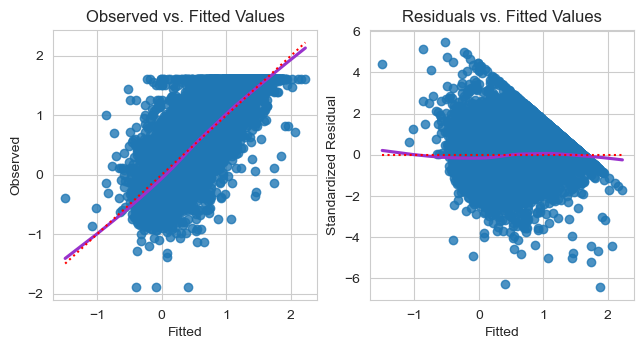

In [8]:
fig, ax = linearity_test(model, np.log(y_train))
plt.show()

## Assumption 2


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   1.229698e+03
p-value                        2.631766e-247
f-value                         6.417043e+01
f p-value                      1.712594e-259

 Goldfeld-Quandt test ----
                value
F statistic  1.042441
p-value      0.042246

 Residuals plots ----


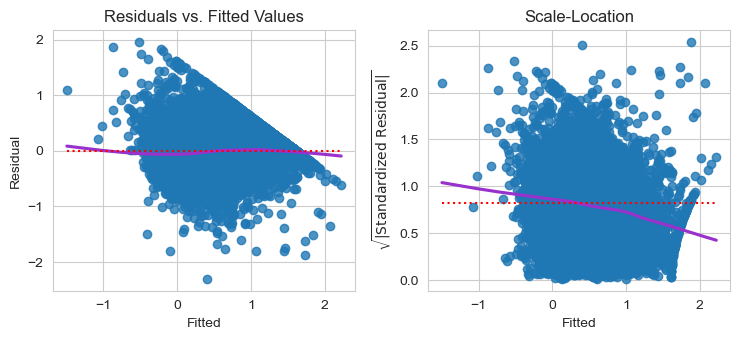

In [9]:
fig, ax = homoscedasticity_test(model)
plt.show()

## Assumption 3

C:\Users\elder\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test ---- statistic: 0.9892, p-value: 0.0000
D'Agostino-Pearson Omnibus test ---- statistic: 467.3256, p-value: 0.0000
Lilliefors test ---- statistic: 0.0296, p-value: 0.0010
Jarque-Bera test ---- statistic: 1194.6857, p-value: 3.7783485929283745e-260
Kolmogorov-Smirnov test ---- statistic: 0.0296, p-value: 0.0000
Anderson-Darling test ---- statistic: 23.6014, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


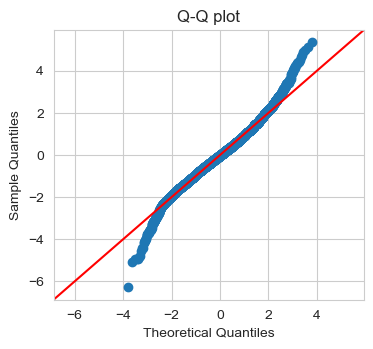

In [10]:
fig, ax = normality_of_residuals_test(model)
plt.show()

## Assumption 4

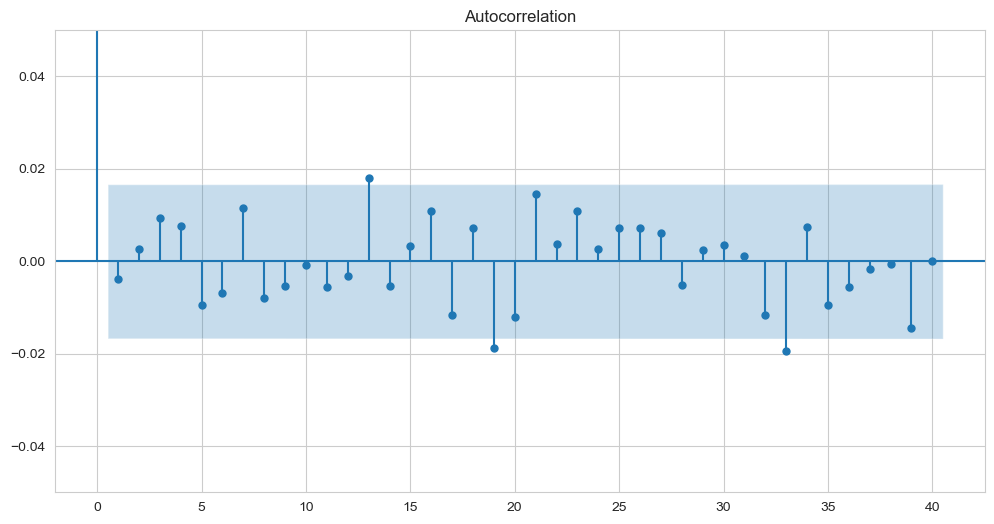

In [11]:
fig, ax = autocorrelation_plot(model)
ax.set_ylim([-0.05, 0.05])
plt.show()

## Multicollinearity

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [13]:
y, X = dmatrices(formula, data=Xy_train, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, ii) \
              for ii in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

             VIF                       features
0     384.310063                      Intercept
1      33.870014                         MedInc
2      70.865080                       HouseAge
3      68.320538                       AveRooms
4      63.675270                      AveBedrms
5     267.991899                     Population
6      16.774191                 I(MedInc ** 2)
7      52.250337                MedInc:AveRooms
8     155.161139              MedInc:Population
9     136.614144            AveRooms:Population
10    138.972519     MedInc:AveRooms:Population
11     20.479227               I(HouseAge ** 2)
12     35.648644              HouseAge:AveRooms
13     72.909362             HouseAge:AveBedrms
14  12277.152182             AveRooms:AveBedrms
15    163.297941    HouseAge:AveRooms:AveBedrms
16   4185.507369               I(AveRooms ** 2)
17    223.207417           AveBedrms:Population
18     51.148906  AveRooms:AveBedrms:Population
19   2555.306227              I(AveBedrm

We see some huge numbers here! But of course this includes lots of interactions and squared terms. From Lesson 37, we have a few options here, including centering the data. One easy way to do this is to standardize those inputs. Let's try that.

In [14]:
Z_train = stats.zscore(X_train, ddof=1)

In [15]:
y, X = dmatrices(formula, data=Z_train.join(y_train), return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, ii) \
              for ii in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

             VIF                       features
0       2.502175                      Intercept
1       3.698451                         MedInc
2       1.238855                       HouseAge
3      10.188833                       AveRooms
4      25.903039                      AveBedrms
5       2.179047                     Population
6       3.198268                 I(MedInc ** 2)
7       5.397958                MedInc:AveRooms
8       3.707082              MedInc:Population
9      13.118792            AveRooms:Population
10      3.639096     MedInc:AveRooms:Population
11      1.094805               I(HouseAge ** 2)
12      3.336297              HouseAge:AveRooms
13      5.422731             HouseAge:AveBedrms
14  10796.174621             AveRooms:AveBedrms
15      5.184138    HouseAge:AveRooms:AveBedrms
16   3384.690911               I(AveRooms ** 2)
17     29.028692           AveBedrms:Population
18   1570.180707  AveRooms:AveBedrms:Population
19   1991.914639              I(AveBedrm

We still have some massive multicollinearity in the data. Let's explore more about what happened when we took the z scores. Does that affect the model?

In [16]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                 OLS                     Adj. R-squared:      0.583     
Dependent Variable:    I(np.log(MedHouseVal))  AIC:                 11508.0466
Date:                  2023-08-21 18:16        BIC:                 11673.8045
No. Observations:      13828                   Log-Likelihood:      -5732.0   
Df Model:              21                      F-statistic:         920.5     
Df Residuals:          13806                   Prob (F-statistic):  0.00      
R-squared:             0.583                   Scale:               0.13436   
------------------------------------------------------------------------------
                               Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                     -0.7440   0.0611 -12.1747 0.0000 -0.8637 -0.6242
MedInc                         0.4910   0.0095  51.5019 0.0000  0.4723  0.5096
HouseAge                      -0.0054   0.0021  -2.5992 0.0094 -0.0095 -0.0013
AveRooms                      -0.1538   0.0105 -14.6209 0.0000 -0.1744 -0.1332
AveBedrms                      0.3765   0.0558   6.7467 0.0000  0.2671  0.4859
Population                    -0.0001   0.0000  -1.6445 0.1001 -0.0002  0.0000
I(MedInc ** 2)                -0.0235   0.0006 -40.7441 0.0000 -0.0247 -0.0224
MedInc:AveRooms                0.0028   0.0013   2.1951 0.0282  0.0003  0.0054
MedInc:Population             -0.0000   0.0000  -1.3917 0.1640 -0.0000  0.0000
AveRooms:Population           -0.0001   0.0000 -11.7096 0.0000 -0.0001 -0.0001
MedInc:AveRooms:Population     0.0000   0.0000   5.8318 0.0000  0.0000  0.0000
I(HouseAge ** 2)               0.0001   0.0000   6.3101 0.0000  0.0001  0.0002
HouseAge:AveRooms              0.0000   0.0002   0.0786 0.9373 -0.0004  0.0004
HouseAge:AveBedrms             0.0069   0.0016   4.2930 0.0000  0.0037  0.0100
AveRooms:AveBedrms            -0.0640   0.0097  -6.5778 0.0000 -0.0830 -0.0449
HouseAge:AveRooms:AveBedrms   -0.0003   0.0000  -7.4945 0.0000 -0.0003 -0.0002
I(AveRooms ** 2)               0.0095   0.0011   8.9344 0.0000  0.0074  0.0115
AveBedrms:Population           0.0003   0.0000   8.2551 0.0000  0.0002  0.0004
AveRooms:AveBedrms:Population  0.0000   0.0000   0.0329 0.9738 -0.0000  0.0000
I(AveBedrms ** 2)              0.1261   0.0232   5.4389 0.0000  0.0807  0.1715
I(Population ** 2)             0.0000   0.0000   3.8642 0.0001  0.0000  0.0000
I(AveOccup ** 2)              -0.0000   0.0000  -5.7316 0.0000 -0.0000 -0.0000
------------------------------------------------------------------------------
Omnibus:                 467.326          Durbin-Watson:             2.007    
Prob(Omnibus):           0.000            Jarque-Bera (JB):          1194.686 
Skew:                    0.136            Prob(JB):                  0.000    
Kurtosis:                4.414            Condition No.:             368384174
==============================================================================
* The condition number is large (4e+08). This might indicate
strong multicollinearity or other numerical problems.
"""

In [17]:
model_z = smf.ols(formula, Z_train.join(y_train)).fit()
model_z.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                 OLS                     Adj. R-squared:      0.583     
Dependent Variable:    I(np.log(MedHouseVal))  AIC:                 11508.2207
Date:                  2023-08-21 18:16        BIC:                 11673.9786
No. Observations:      13828                   Log-Likelihood:      -5732.1   
Df Model:              21                      F-statistic:         920.5     
Df Residuals:          13806                   Prob (F-statistic):  0.00      
R-squared:             0.583                   Scale:               0.13436   
------------------------------------------------------------------------------
                               Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                      0.6059   0.0049 122.8742 0.0000  0.5962  0.6155
MedInc                         0.6725   0.0060 112.1736 0.0000  0.6607  0.6842
HouseAge                       0.0925   0.0035  26.6474 0.0000  0.0857  0.0993
AveRooms                      -0.4399   0.0100 -44.2132 0.0000 -0.4594 -0.4204
AveBedrms                      0.4034   0.0159  25.4294 0.0000  0.3723  0.4345
Population                     0.0028   0.0046   0.6155 0.5382 -0.0062  0.0119
I(MedInc ** 2)                -0.0853   0.0021 -40.7448 0.0000 -0.0894 -0.0812
MedInc:AveRooms                0.0503   0.0067   7.5592 0.0000  0.0373  0.0634
MedInc:Population              0.0450   0.0062   7.3113 0.0000  0.0329  0.0570
AveRooms:Population           -0.1201   0.0103 -11.6708 0.0000 -0.1402 -0.0999
MedInc:AveRooms:Population     0.0297   0.0051   5.8355 0.0000  0.0198  0.0397
I(HouseAge ** 2)               0.0188   0.0030   6.3105 0.0000  0.0130  0.0247
HouseAge:AveRooms             -0.0088   0.0063  -1.3935 0.1635 -0.0213  0.0036
HouseAge:AveBedrms             0.0301   0.0084   3.5693 0.0004  0.0136  0.0466
AveRooms:AveBedrms            -0.0783   0.0112  -7.0142 0.0000 -0.1002 -0.0564
HouseAge:AveRooms:AveBedrms   -0.0038   0.0005  -7.4943 0.0000 -0.0048 -0.0028
I(AveRooms ** 2)               0.0567   0.0063   8.9332 0.0000  0.0443  0.0691
AveBedrms:Population           0.1594   0.0152  10.4968 0.0000  0.1296  0.1891
AveRooms:AveBedrms:Population  0.0001   0.0035   0.0321 0.9744 -0.0068  0.0070
I(AveBedrms ** 2)              0.0250   0.0046   5.4374 0.0000  0.0160  0.0341
I(Population ** 2)             0.0017   0.0004   3.8632 0.0001  0.0008  0.0025
I(AveOccup ** 2)              -0.0002   0.0000  -5.7164 0.0000 -0.0003 -0.0002
------------------------------------------------------------------------------
Omnibus:                  467.276          Durbin-Watson:             2.007   
Prob(Omnibus):            0.000            Jarque-Bera (JB):          1194.622
Skew:                     0.135            Prob(JB):                  0.000   
Kurtosis:                 4.414            Condition No.:             572     
==============================================================================

"""

We still have the same model (see the identical MSE for example), just based on standardized inputs. Note the effects of VIF alter some of the t-statistics and p-values by term - the variance inflation in VIF refers to inflation of the standard error.

Ok, with that established, maybe we should remove some of those terms with super-high VIF. The three largest offender is the AveRooms:AveBedrms interaction (and higher order terms including that).

In [18]:
formula2 = formula + ' - AveRooms:AveBedrms:Population - HouseAge:AveRooms:AveBedrms' + \
           ' - HouseAge:AveBedrms'
model2 = smf.ols(formula2, data=Xy_train).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                OLS                    Adj. R-squared:     0.581     
Dependent Variable:   I(np.log(MedHouseVal)) AIC:                11559.9351
Date:                 2023-08-21 18:16       BIC:                11703.0896
No. Observations:     13828                  Log-Likelihood:     -5761.0   
Df Model:             18                     F-statistic:        1066.     
Df Residuals:         13809                  Prob (F-statistic): 0.00      
R-squared:            0.582                  Scale:              0.13489   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                  -1.0123   0.0474 -21.3729 0.0000 -1.1052 -0.9195
MedInc                      0.4807   0.0094  50.8742 0.0000  0.4622  0.4992
HouseAge                    0.0039   0.0015   2.6145 0.0089  0.0010  0.0069
AveRooms                   -0.1307   0.0093 -14.0851 0.0000 -0.1489 -0.1125
AveBedrms                   0.5555   0.0400  13.9002 0.0000  0.4772  0.6339
Population                 -0.0000   0.0000  -0.8569 0.3915 -0.0001  0.0000
I(MedInc ** 2)             -0.0236   0.0006 -40.9330 0.0000 -0.0248 -0.0225
MedInc:AveRooms             0.0044   0.0013   3.4682 0.0005  0.0019  0.0069
MedInc:Population          -0.0000   0.0000  -1.0938 0.2741 -0.0000  0.0000
AveRooms:Population        -0.0001   0.0000 -14.5709 0.0000 -0.0001 -0.0001
MedInc:AveRooms:Population  0.0000   0.0000   5.7030 0.0000  0.0000  0.0000
I(HouseAge ** 2)            0.0001   0.0000   5.9673 0.0000  0.0001  0.0001
HouseAge:AveRooms          -0.0006   0.0002  -3.6624 0.0003 -0.0009 -0.0003
AveRooms:AveBedrms         -0.0527   0.0095  -5.5579 0.0000 -0.0713 -0.0341
I(AveRooms ** 2)            0.0070   0.0010   6.9972 0.0000  0.0050  0.0089
AveBedrms:Population        0.0003   0.0000  10.1976 0.0000  0.0002  0.0003
I(AveBedrms ** 2)           0.0904   0.0224   4.0337 0.0001  0.0465  0.1344
I(Population ** 2)          0.0000   0.0000   3.7926 0.0001  0.0000  0.0000
I(AveOccup ** 2)           -0.0000   0.0000  -6.0471 0.0000 -0.0000 -0.0000
---------------------------------------------------------------------------
Omnibus:                497.544         Durbin-Watson:            2.006    
Prob(Omnibus):          0.000           Jarque-Bera (JB):         1289.854 
Skew:                   0.153           Prob(JB):                 0.000    
Kurtosis:               4.465           Condition No.:            263644980
===========================================================================
* The condition number is large (3e+08). This might indicate
strong multicollinearity or other numerical problems.
"""

In [19]:
y, X = dmatrices(formula2, data=Z_train.join(y_train), return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, ii) \
              for ii in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

            VIF                    features
0      2.365964                   Intercept
1      3.681261                      MedInc
2      1.223988                    HouseAge
3     10.060624                    AveRooms
4     17.598502                   AveBedrms
5      2.155926                  Population
6      3.181276              I(MedInc ** 2)
7      5.283118             MedInc:AveRooms
8      3.691064           MedInc:Population
9     12.778944         AveRooms:Population
10     3.605306  MedInc:AveRooms:Population
11     1.082398            I(HouseAge ** 2)
12     1.897093           HouseAge:AveRooms
13  9251.373428          AveRooms:AveBedrms
14  2993.367001            I(AveRooms ** 2)
15    25.170981        AveBedrms:Population
16  1855.513952           I(AveBedrms ** 2)
17     1.844533          I(Population ** 2)
18     1.305836            I(AveOccup ** 2)


We still have some serious multicollinearity.

In [20]:
formula2 = formula + ' - AveRooms:AveBedrms:Population - HouseAge:AveRooms:AveBedrms' + \
        ' - HouseAge:AveBedrms - AveRooms:AveBedrms - I(AveRooms ** 2) - I(AveBedrms ** 2)' + \
        ''
model2 = smf.ols(formula2, data=Xy_train).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                OLS                    Adj. R-squared:     0.571     
Dependent Variable:   I(np.log(MedHouseVal)) AIC:                11893.2593
Date:                 2023-08-21 18:16       BIC:                12013.8105
No. Observations:     13828                  Log-Likelihood:     -5930.6   
Df Model:             15                     F-statistic:        1227.     
Df Residuals:         13812                  Prob (F-statistic): 0.00      
R-squared:            0.571                  Scale:              0.13821   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                  -0.9336   0.0412 -22.6699 0.0000 -1.0143 -0.8529
MedInc                      0.4712   0.0091  52.0628 0.0000  0.4535  0.4890
HouseAge                   -0.0023   0.0015  -1.5689 0.1167 -0.0052  0.0006
AveRooms                   -0.0817   0.0085  -9.6418 0.0000 -0.0983 -0.0651
AveBedrms                   0.3437   0.0266  12.9241 0.0000  0.2916  0.3959
Population                  0.0000   0.0000   1.3823 0.1669 -0.0000  0.0001
I(MedInc ** 2)             -0.0229   0.0006 -39.4391 0.0000 -0.0240 -0.0217
MedInc:AveRooms             0.0018   0.0012   1.5801 0.1141 -0.0004  0.0041
MedInc:Population          -0.0000   0.0000  -2.7475 0.0060 -0.0000 -0.0000
AveRooms:Population        -0.0001   0.0000 -22.2959 0.0000 -0.0001 -0.0001
MedInc:AveRooms:Population  0.0000   0.0000   9.4494 0.0000  0.0000  0.0000
I(HouseAge ** 2)            0.0001   0.0000   7.7390 0.0000  0.0001  0.0002
HouseAge:AveRooms           0.0002   0.0001   1.6902 0.0910 -0.0000  0.0005
AveBedrms:Population        0.0003   0.0000  13.7853 0.0000  0.0003  0.0004
I(Population ** 2)          0.0000   0.0000   4.9682 0.0000  0.0000  0.0000
I(AveOccup ** 2)           -0.0000   0.0000  -5.9955 0.0000 -0.0000 -0.0000
---------------------------------------------------------------------------
Omnibus:                596.453         Durbin-Watson:            2.001    
Prob(Omnibus):          0.000           Jarque-Bera (JB):         1632.451 
Skew:                   0.197           Prob(JB):                 0.000    
Kurtosis:               4.637           Condition No.:            205036187
===========================================================================
* The condition number is large (2e+08). This might indicate
strong multicollinearity or other numerical problems.
"""

In [21]:
y, X = dmatrices(formula2, data=Z_train.join(y_train), return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, ii) \
              for ii in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

          VIF                    features
0    2.294784                   Intercept
1    3.527449                      MedInc
2    1.210454                    HouseAge
3    8.955074                    AveRooms
4   16.905608                   AveBedrms
5    2.124072                  Population
6    3.128107              I(MedInc ** 2)
7    4.527171             MedInc:AveRooms
8    3.410273           MedInc:Population
9   11.108237         AveRooms:Population
10   3.226814  MedInc:AveRooms:Population
11   1.068596            I(HouseAge ** 2)
12   1.611704           HouseAge:AveRooms
13  19.153583        AveBedrms:Population
14   1.801928          I(Population ** 2)
15   1.288940            I(AveOccup ** 2)


That's much better, but we could remove even more.

In [22]:
formula2 = formula + ' - AveRooms:AveBedrms:Population - HouseAge:AveRooms:AveBedrms' + \
        ' - HouseAge:AveBedrms - AveRooms:AveBedrms - I(AveRooms ** 2) - I(AveBedrms ** 2)' + \
        ' - AveBedrms:Population - MedInc:AveRooms:Population - AveRooms:Population - AveBedrms'
model2 = smf.ols(formula2, data=Xy_train).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:              OLS                    Adj. R-squared:     0.513     
Dependent Variable: I(np.log(MedHouseVal)) AIC:                13622.5369
Date:               2023-08-21 18:16       BIC:                13712.9503
No. Observations:   13828                  Log-Likelihood:     -6799.3   
Df Model:           11                     F-statistic:        1327.     
Df Residuals:       13816                  Prob (F-statistic): 0.00      
R-squared:          0.514                  Scale:              0.15667   
--------------------------------------------------------------------------
                      Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------------
Intercept            -0.8946    0.0407  -21.9920  0.0000  -0.9744  -0.8149
MedInc                0.4011    0.0072   55.8841  0.0000   0.3871   0.4152
HouseAge              0.0060    0.0015    3.9103  0.0001   0.0030   0.0090
AveRooms              0.0062    0.0057    1.0936  0.2741  -0.0049   0.0174
Population            0.0001    0.0000    7.0261  0.0000   0.0000   0.0001
I(MedInc ** 2)       -0.0151    0.0006  -27.2781  0.0000  -0.0162  -0.0140
MedInc:AveRooms      -0.0025    0.0011   -2.3935  0.0167  -0.0046  -0.0005
MedInc:Population    -0.0000    0.0000   -3.3885  0.0007  -0.0000  -0.0000
I(HouseAge ** 2)      0.0001    0.0000    5.2183  0.0000   0.0001   0.0001
HouseAge:AveRooms    -0.0007    0.0001   -4.6681  0.0000  -0.0010  -0.0004
I(Population ** 2)   -0.0000    0.0000   -4.3623  0.0000  -0.0000  -0.0000
I(AveOccup ** 2)     -0.0000    0.0000   -4.4544  0.0000  -0.0000  -0.0000
-------------------------------------------------------------------------
Omnibus:               1009.295        Durbin-Watson:           2.002    
Prob(Omnibus):         0.000           Jarque-Bera (JB):        2961.726 
Skew:                  0.385           Prob(JB):                0.000    
Kurtosis:              5.132           Condition No.:           188501903
=========================================================================
* The condition number is large (2e+08). This might indicate
strong multicollinearity or other numerical problems.
"""

In [23]:
y, X = dmatrices(formula2, data=Z_train.join(y_train), return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, ii) \
              for ii in range(X.shape[1])]
vif['features'] = X.columns
print(vif)

         VIF            features
0   2.092481           Intercept
1   1.978474              MedInc
2   1.180723            HouseAge
3   2.245245            AveRooms
4   1.700043          Population
5   2.521948      I(MedInc ** 2)
6   2.556226     MedInc:AveRooms
7   1.126332   MedInc:Population
8   1.052032    I(HouseAge ** 2)
9   1.500271   HouseAge:AveRooms
10  1.549324  I(Population ** 2)
11  1.040277    I(AveOccup ** 2)


Ok, now we've removed all of the major multicollinearity! But... is it actually a better model? Our BIC has gone up. How are our other assumptions faring?

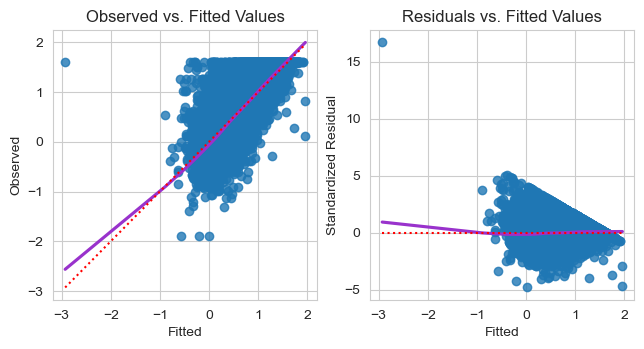

In [24]:
fig, ax = linearity_test(model2, np.log(y_train))
plt.show()

Not too bad. Massive outlier though.


 Breusch-Pagan test ----
                                     value
Lagrange multiplier statistic  2909.869182
p-value                           0.000000
f-value                         334.745549
f p-value                         0.000000

 Goldfeld-Quandt test ----
                value
F statistic  1.042341
p-value      0.042492

 Residuals plots ----


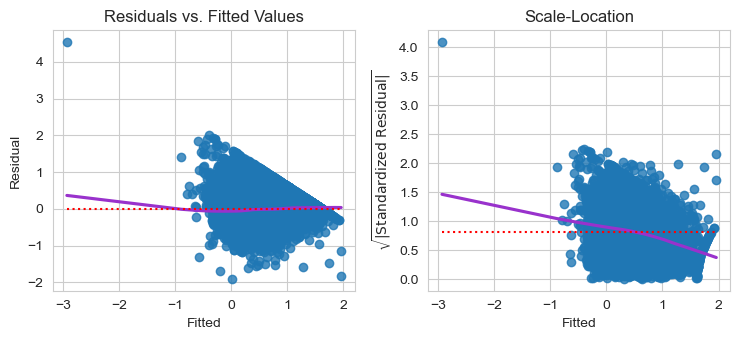

In [25]:
fig, ax = homoscedasticity_test(model2)
plt.show()

There that outlier is again. We know we'll have issues here thanks to the censored data, and it's clear here as before.

C:\Users\elder\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test ---- statistic: 0.9876, p-value: 0.0000
D'Agostino-Pearson Omnibus test ---- statistic: 1009.2951, p-value: 0.0000
Lilliefors test ---- statistic: 0.0321, p-value: 0.0010
Jarque-Bera test ---- statistic: 2961.7264, p-value: 0.0
Kolmogorov-Smirnov test ---- statistic: 0.0321, p-value: 0.0000
Anderson-Darling test ---- statistic: 20.9537, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


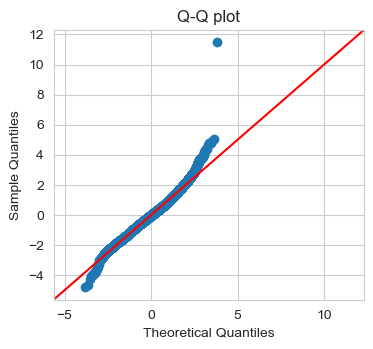

In [26]:
fig, ax = normality_of_residuals_test(model2)
plt.show()

This is also comparable to our previous model - with the exception again of the outlier.

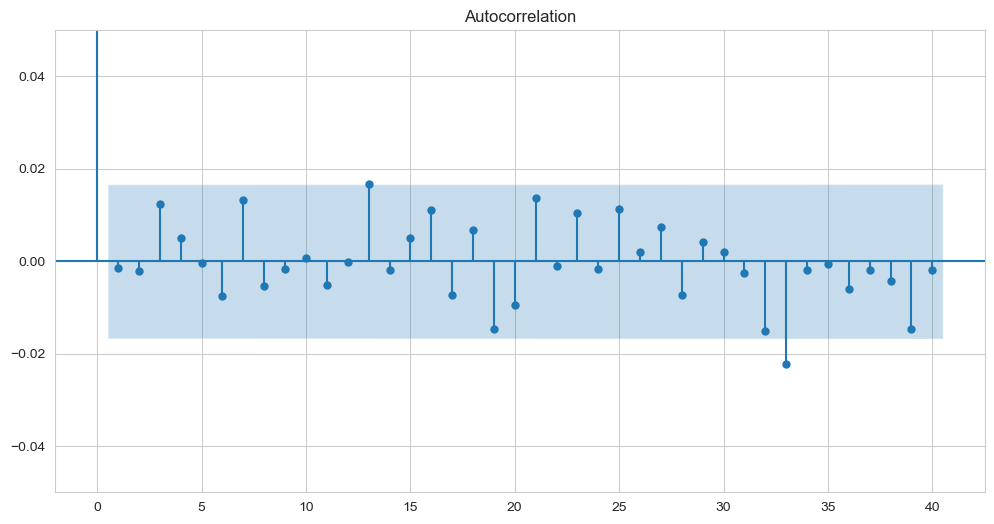

In [27]:
fig, ax = autocorrelation_plot(model2)
ax.set_ylim([-0.05, 0.05])
plt.show()

Overall, this looks similar to the original model... except for one HUGE outlier! Maybe all those terms were allowing us to fit that one data point, considering what makes it unique. 

In [28]:
model2.resid.argmax()

10475

In [29]:
Xy_train.iloc[10475]

MedInc           1.875000
HouseAge        33.000000
AveRooms       141.909091
AveBedrms       25.636364
Population      30.000000
AveOccup         2.727273
Latitude        38.910000
Longitude     -120.100000
MedHouseVal      5.000010
Name: 1914, dtype: float64

Well that's... a weird datapoint. Average occupancy in this block is less than 3, but houses have on average 142 rooms, 26 of which are bedrooms. This is either a data error or an island of mansions that only the house staff lives in.

It's hard to know which model is truly better, but this is a great time to use the validation data to compare those two models.

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_val, np.exp(model.predict(X_val))) ** 0.5

0.7631055909522774

In [32]:
mean_squared_error(y_val, np.exp(model2.predict(X_val))) ** 0.5

0.7899353331977899

Well, in this case it looks like we should choose the original model. It has multicollinearity issues, so we shouldn't make inferences about the individual terms, but we can still use it for prediction! However, the difference is not huge... maybe you should pick the fixed model?

But, of course, we used the validation data to pick the original model. Which worked better on the test data at the end of the day?

In [33]:
mean_squared_error(y_test, np.exp(model.predict(X_test))) ** 0.5

0.8231617368849486

In [34]:
mean_squared_error(y_test, np.exp(model2.predict(X_test))) ** 0.5

0.8549018572601366

The original model still turns out slightly better with respect to RMSE.

Ultimately, you have to decide if explanatory power (being able to communicate how various factors are impacting the response) or predictive power (being able to accurately predict new points) is more important. If you were informing housing policy, the slimmed-down model would probably be the better choice (noting the caveat of Census District 18681). If you were informing real estate estimates, the fuller model would be better.